In [0]:
# Necessary imports 
# for task 1
from datetime import datetime   
import pytz   
# for task 2
import h5py
import pandas as pd
# for task 3
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# The file provided for the assessment 
hdf_file = '1541962108935000000_167_838.h5'

**Task 1**

In [3]:
# convert number into seconds  from nano seconds 
file_number = int(hdf_file[:19]) // (10**9)

dt =  datetime.fromtimestamp(file_number)

# utc time and date
utc_dt = pytz.utc.localize(dt)
# cern date time - timezone -> CET
cern_dt = pytz.timezone('CET').localize(dt)

# print both datetime
print('UTC -> ', utc_dt)
print('CERN -> ', cern_dt)


UTC ->  2018-11-11 18:48:28+00:00
CERN ->  2018-11-11 18:48:28+01:00


**Task 2** -> The output file is 

In [0]:
# Task 2 using pandas dataframe
file = h5py.File(hdf_file, 'r')

data = {}

def getfeatures(path, element):
  if isinstance(element, h5py.Dataset):
    try:
      data_type = element.dtype
    except Exception as e:
      # exception can be seen here :
      # please see https://github.com/h5py/h5py/issues/109
      data_type = str(e)
    data[path] = ['Dataset', element.size, element.shape, data_type]
  else:
    data[path] = ['Group', '','','']
    
    
    
file.visititems(getfeatures)

# convert into a dataframe
df = pd.DataFrame.from_dict(data,orient='index',columns=['Element-type','Size','Shape','Data-type'])

# writing the dataframe into a csv file
df.to_csv('data_task2.csv', sep=',')

 





**Task 3**

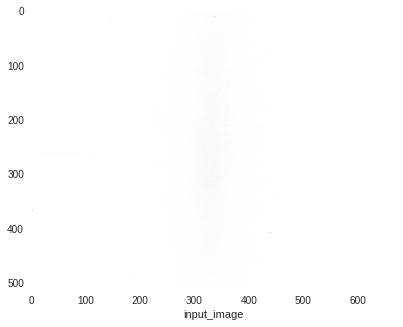

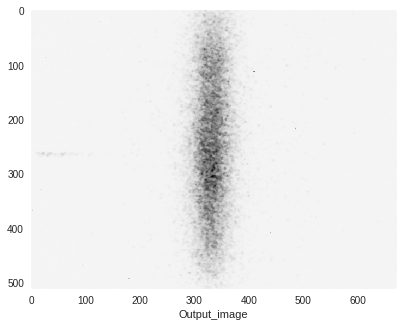

In [22]:
# Task 3
with h5py.File(hdf_file, 'r') as file:
  
  #get the required image information 
  
  imageRawData = np.array(file.get('/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData'))
  height = file.get('/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight')[0]
  width = file.get('/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth')[0]
  
  #reshape 
  img = imageRawData.reshape(height, width)
  
  #filter
  imgFiltered = medfilt(img)
  
  # image settings
  plt.rcParams["axes.grid"] = False
  fig = plt.figure(figsize=(width/100,height/100))
  
  ax.set_frame_on(False)
  plt.xlabel('input_image')
  
  plt.imshow(img)
  
  fig = plt.figure(figsize=(width/100,height/100))
  plt.xlabel('Output_image')
  ax.set_frame_on(False)
  plt.imshow(imgFiltered)
  ax.set_frame_on(False)
  # saving the image as directed in the task 3
  plt.savefig('image.png')
  
  
  
  

    
